In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import datetime as dt
import dateutil

In [22]:
# test api starting at the year 2000
test_url='https://www.quandl.com/api/v3/datasets/ZILLOW/Z95932_ZHVISF?start_date=2015-01-01&api_key=sPG_jsHhtuegYcT7TNWz'
response=requests.get(test_url).json()

In [34]:
# grabbing the data from the response
data=response['dataset']['data']

In [24]:
# mapping the data to a list of lists since sklearn requires a 2D array
def pull_price(n):
    return [n[1]]
# date must be converted to ordinal since its a numeric value which regression requires
def pull_dates(n):
    return [dt.datetime.strptime(n[0], '%Y-%m-%d').toordinal()]
dates=list(map(pull_dates,data))
prices=list(map(pull_price,data))

In [25]:
#formatting the data to a numpy array 
y=np.array(prices)
# prices

In [26]:
# grabbing the latest date to be able to predict the next 12 months
now=dt.datetime.now()
# utility for adding months to a datetime object
a_month = dateutil.relativedelta.relativedelta(months=1)
# making 2 lists, one of the dates as strings, one as ordinals
next_year_ord=[]
next_year_strings=[]
temp=now
for i in range(12):
    temp=temp+a_month
    next_year_ord.append([temp.toordinal()])
    next_year_strings.append(temp.strftime('%Y-%m-%d'))
print(next_year_strings)
next_year_ord

['2021-01-09', '2021-02-09', '2021-03-09', '2021-04-09', '2021-05-09', '2021-06-09', '2021-07-09', '2021-08-09', '2021-09-09', '2021-10-09', '2021-11-09', '2021-12-09']


[[737799],
 [737830],
 [737858],
 [737889],
 [737919],
 [737950],
 [737980],
 [738011],
 [738042],
 [738072],
 [738103],
 [738133]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dates, y, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 27596880.285835557
R-squared (R2 ): 0.8620688867908924


In [29]:
model.score(X_test, y_test)

0.8620688867908924

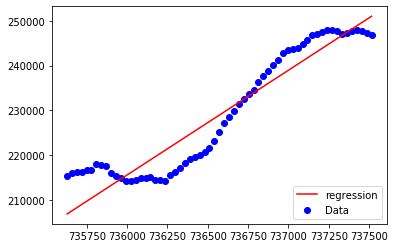

In [30]:
plt.scatter(dates,prices,label='Data',color='blue')
plt.plot(dates,model.predict(dates),label='regression',color='red')
plt.legend(loc='lower right')

In [31]:
# predicting the next year after the latest date
predictions=model.predict(next_year_ord)
predictions

array([[257647.18141966],
       [258372.53502779],
       [259027.69312545],
       [259753.04673358],
       [260455.00183823],
       [261180.35544636],
       [261882.310551  ],
       [262607.66415914],
       [263333.01776727],
       [264034.97287191],
       [264760.32648004],
       [265462.28158469]])

In [32]:
to_return={}
for i in range(len(predictions)):
    to_return[next_year_strings[i]]=predictions[i][0]
to_return

{'2021-01-09': 257647.18141965568,
 '2021-02-09': 258372.5350277871,
 '2021-03-09': 259027.69312545285,
 '2021-04-09': 259753.04673358425,
 '2021-05-09': 260455.0018382296,
 '2021-06-09': 261180.355446361,
 '2021-07-09': 261882.31055100262,
 '2021-08-09': 262607.66415913776,
 '2021-09-09': 263333.01776726916,
 '2021-10-09': 264034.9728719108,
 '2021-11-09': 264760.3264800422,
 '2021-12-09': 265462.28158468753}